In [2]:
import pandas as pd


# Assuming the file name is 'mcdonalds.csv'
mcdonalds = pd.read_csv('/content/mcdonalds.csv')

# Display column names
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [3]:
# Get the dimensions of the DataFrame
mcdonalds.shape


(1453, 15)

In [4]:
# Display the first 3 rows of the DataFrame
mcdonalds.head(3)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
import pandas as pd
import numpy as np

# Select columns 1 to 11
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x_binary = (MD_x == "Yes").astype(int)

# Calculate column means and round to 2 decimal places
col_means = MD_x_binary.mean(axis=0).round(2)

# Combine column names and mean values into a DataFrame for better presentation
result = pd.DataFrame({
    'Column Name': col_means.index,
    'Mean Value': col_means.values
})

print(result)


   Column Name  Mean Value
0        yummy        0.55
1   convenient        0.91
2        spicy        0.09
3    fattening        0.87
4       greasy        0.53
5         fast        0.90
6        cheap        0.60
7        tasty        0.64
8    expensive        0.36
9      healthy        0.20
10  disgusting        0.24


In [6]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Convert "Yes" to 1 and "No" to 0 (if not already done)
MD_x_binary = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x_binary)

# Get explained variance ratio (Proportion of Variance)
explained_variance = pca.explained_variance_ratio_

# Get cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Create a DataFrame to display the results similar to R's summary output
pca_summary = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})

# Display the first 11 principal components
print(pca_summary.head(11))


    Standard Deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [7]:
 import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Assuming MD_x_binary is already defined and contains the transformed data
pca = PCA()
MD_pca = pca.fit(MD_x_binary)

# Get the components (rotation matrix)
components = pd.DataFrame(MD_pca.components_, columns=MD_x.columns)

# Round to 1 decimal place
components_rounded = components.round(1)

# Display standard deviations and the components
print("Standard deviations (1, .., p=11):")
print(np.round(np.sqrt(MD_pca.explained_variance_), 1))  # Standard deviations

print("\nRotation (n x k) = (11 x 11):")
print(components_rounded)  # Rotations (principal components)


Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0     0.5         0.2    0.0       -0.1    -0.3   0.1    0.3    0.5   
1    -0.4        -0.0   -0.0        0.0     0.1   0.1    0.6   -0.3   
2     0.3         0.1    0.0        0.3     0.8   0.1    0.1    0.3   
3     0.1        -0.1    0.2       -0.4     0.3  -0.1    0.1   -0.0   
4     0.3        -0.3   -0.1        0.1    -0.4  -0.1    0.1    0.2   
5    -0.2         0.3    0.4        0.4    -0.2   0.6    0.1    0.1   
6    -0.3        -0.1    0.7       -0.4     0.0  -0.1   -0.0    0.4   
7    -0.0         0.1   -0.4       -0.6     0.1   0.6   -0.1    0.1   
8    -0.6         0.0   -0.4        0.2     0.0  -0.2   -0.1    0.6   
9     0.1         0.7    0.1        0.0    -0.0  -0.2   -0.4   -0.1   
10   -0.0         0.5   -0.1       -0.3    -0.0  -0.3    0.5   -0.0   

    expensive  healthy  disgusting 

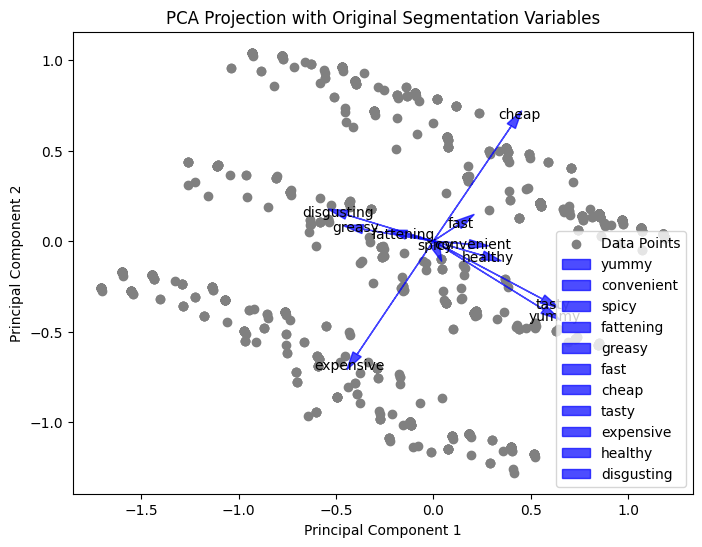

Projected Axes (Principal Components):
[[ 0.47693349  0.15533159  0.00635636 -0.11623168 -0.3044427   0.10849325
   0.33718593  0.47151394 -0.32904173  0.21371062 -0.37475293]
 [-0.36378978 -0.016414   -0.01880869  0.03409395  0.06383884  0.0869722
   0.61063276 -0.3073178  -0.60128596 -0.07659344  0.13965633]]


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming MD_x_binary is already defined
pca = PCA(n_components=2)  # Reduce to 2 components for 2D visualization
pca_result = pca.fit_transform(MD_x_binary)

# Plotting the PCA projection (using the first two components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey', label='Data Points')
plt.title('PCA Projection with Original Segmentation Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Getting the principal components (axes)
proj_axes = pca.components_

# Adding arrows to represent the original variables (segmentation variables)
for i, feature in enumerate(MD_x.columns):
    plt.arrow(0, 0, proj_axes[0, i]*max(pca_result[:, 0]), proj_axes[1, i]*max(pca_result[:, 1]),
              color='blue', alpha=0.7, head_width=0.05, head_length=0.1, label=feature)

# Add labels for the arrows
for i, feature in enumerate(MD_x.columns):
    plt.text(proj_axes[0, i]*max(pca_result[:, 0])*1.1, proj_axes[1, i]*max(pca_result[:, 1])*1.1, feature,
             color='black', ha='center', va='center')

plt.legend()
plt.show()

# Display the projected axes (equivalent to projAxes in R)
print("Projected Axes (Principal Components):")
print(proj_axes)


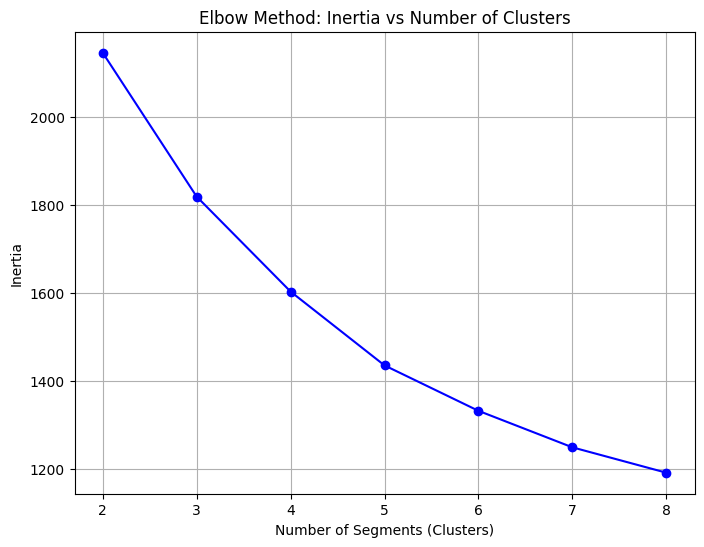

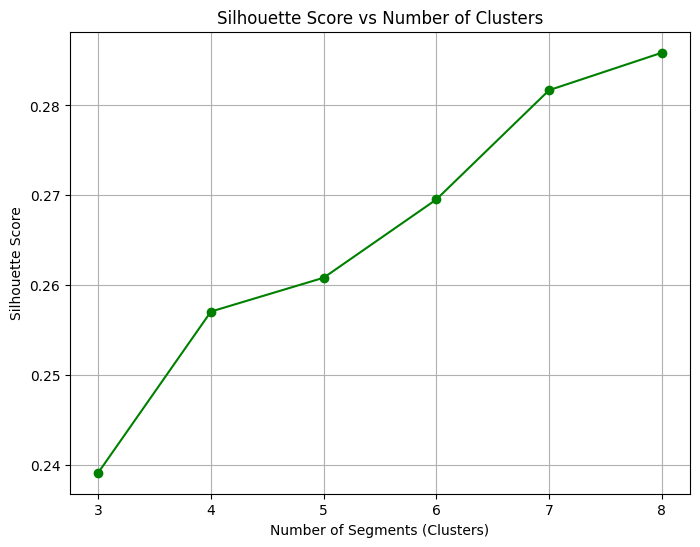

Cluster Centers:
[[0.84304207 0.98058252 0.08899676 0.80420712 0.36569579 0.96278317
  0.92880259 0.96440129 0.01779935 0.30420712 0.04045307]
 [0.81360947 0.95857988 0.12721893 0.90532544 0.62130178 0.86390533
  0.10059172 0.93786982 0.9112426  0.20710059 0.15680473]
 [0.01408451 0.78269618 0.07645875 0.9195171  0.66197183 0.84708249
  0.52716298 0.04627767 0.40442656 0.06237425 0.55331992]]

Cluster Labels for each data point:
[2 1 1 ... 1 0 2]


In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming MD_x_binary is already defined

# Set the random seed for reproducibility
np.random.seed(1234)

# Range of clusters to test
k_range = range(2, 9)
inertia = []  # Store inertia for each k
silhouette_scores = []  # Store silhouette scores for each k

# Try K-means clustering for each number of clusters in the range
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeans.fit(MD_x_binary)

    # Inertia (within-cluster sum of squares)
    inertia.append(kmeans.inertia_)

    # Silhouette score (if k > 1)
    if k > 1:
        score = silhouette_score(MD_x_binary, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)

# Plot inertia to help determine the optimal number of clusters (elbow method)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='blue', label='Inertia')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.grid(True)
plt.show()

# Plot silhouette scores to evaluate clustering quality
plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], silhouette_scores[1:], marker='o', color='green', label='Silhouette Score')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

# Optionally, choose the best number of clusters based on the silhouette score or inertia
# This step would typically involve choosing the optimal 'k' based on these plots

# Assuming we pick the best k (based on elbow or silhouette) and relabel the clusters
best_k = 3  # Example value based on your plots or criteria
kmeans = KMeans(n_clusters=best_k, random_state=1234, n_init=10)
kmeans.fit(MD_x_binary)

# Relabeling: we can store the final cluster labels
MD_km28_labels = kmeans.labels_

# If you want to examine the cluster centers and labels:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("\nCluster Labels for each data point:")
print(MD_km28_labels)


In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Assuming MD_x_binary is your dataset

# Set random seed for reproducibility
np.random.seed(1234)

# List to store results
cluster_results = {}

# Perform KMeans clustering for 2 to 8 clusters, repeated 10 times
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x_binary)
    cluster_results[n_clusters] = kmeans.labels_

# Convert the results to a DataFrame for easy inspection
cluster_df = pd.DataFrame(cluster_results)

# Relabel clusters (optional - you can relabel based on size or some other criteria)
# Here, we relabel by sorting cluster sizes (in terms of their frequency)
relabelled_clusters = {}

for n_clusters, labels in cluster_results.items():
    # Count the frequency of each cluster label
    cluster_counts = pd.Series(labels).value_counts().sort_index()

    # Create a mapping from old labels to sorted labels based on frequency
    label_mapping = {old_label: new_label for new_label, old_label in enumerate(cluster_counts.index)}

    # Apply the mapping to relabel the clusters
    relabelled_labels = pd.Series(labels).map(label_mapping)

    # Store the relabelled clusters
    relabelled_clusters[n_clusters] = relabelled_labels

# Convert relabelled clusters to a DataFrame for easy inspection
relabelled_cluster_df = pd.DataFrame(relabelled_clusters)

# Display relabelled cluster assignments for 2 clusters as an example
print("Relabelled Clusters for 2 clusters:")
print(relabelled_cluster_df[2].head())


Relabelled Clusters for 2 clusters:
0    1
1    0
2    0
3    0
4    1
Name: 2, dtype: int64


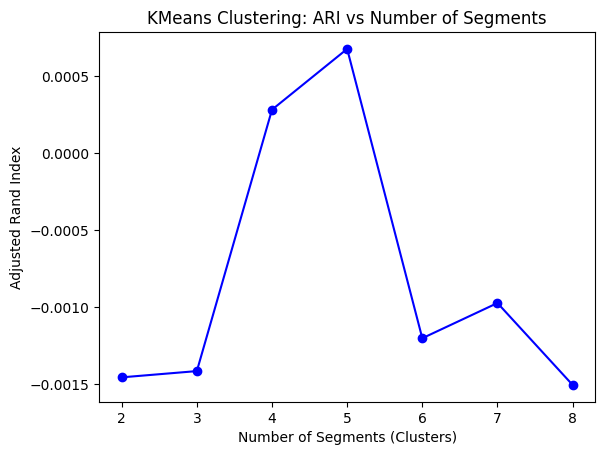

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import numpy as np

# Assuming MD_x_binary is your dataset

# Set random seed for reproducibility
np.random.seed(1234)

# List to store ARI values for different cluster sizes
ari_values = []

# Perform KMeans clustering for 2 to 8 clusters
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x_binary)

    # Use bootstrapping to get adjusted rand index (ARI) for 100 bootstrapped samples
    ari_bootstrap_values = []
    for _ in range(100):
        # Bootstrap resample (no second value to unpack)
        X_resampled = resample(MD_x_binary, random_state=1234)

        # Fit KMeans to the resampled data
        kmeans_resampled = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans_resampled.fit(X_resampled)

        # Compute the Adjusted Rand Index (ARI) between the original and resampled clusters
        ari = adjusted_rand_score(kmeans.labels_, kmeans_resampled.labels_)
        ari_bootstrap_values.append(ari)

    # Average ARI value over the bootstrap iterations
    ari_values.append(np.mean(ari_bootstrap_values))

# Plotting Adjusted Rand Index (ARI) vs. number of clusters
plt.plot(range(2, 9), ari_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Segments (Clusters)")
plt.ylabel("Adjusted Rand Index")
plt.title("KMeans Clustering: ARI vs Number of Segments")
plt.show()
